# Part (d): Correlation
### UE22CS342AA2 - Data Analytics 
- Karthik Namboori - namkarthik2003@gmail.com
- `Correlation` is a measure of the strength and direction of linear relationship between two random variables in other words it is a measure of the association between two variables.
- Correlation is a descriptive statistic that lies in the range of `(-1,1)`
- There are different types of correlation coefficients, based on the nature of the data being compared:
    - Between two continuous (interval, ratio) random variables - Pearson’s Product Moment Correlation Coefficient
    - Between two ordinal random variables - Spearman-Rank Correlation Coefficient
    - Between a continuous RV and a dichotomous RV - Point Bi-Serial Correlation Coefficient
    - Between two binary random variables - Phi Coefficient
    
    
    
- Problems
    - Problem 1
    - Problem 2
    - Problem 3
    - Problem 4
    - Problem 5
    - Problem 6


# About The Dataset

- The dataset is a summary of various health and disease related statistics of various countries and the effect the economy has on the health status (or maybe not). Below is the description of each column of the dataset.

1. **SlNo**: Serial Number – A unique identifier for each record.
2. **Country**: Name of the country where the data was collected.
3. **Year**: Year in which the data was recorded (Ranges from 2001 to 2004).
4. **Status**: Development status of the country (e.g., Developing, Developed).
5. **Life_Expectancy**: Average life expectancy at birth in years.
6. **Tuberculosis**: Number of tuberculosis cases per 100,000 people.
7. **Influenza**: Number of influenza cases per 100,000 people.
8. **Adult_Mortality**: Number of adult deaths (per 1,000) between ages 15 and 60.
9. **Infant_Deaths**: Number of infant deaths.
10. **Alcohol**: Per capita alcohol consumption (in liters).
11. **Percentage_Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
12. **Hepatitis_B**: Number of Hepatitis B cases per 100,000 people.
13. **Measles**: Number of measles cases per 100,000 people.
14. **Under_Five_Deaths**: Number of under-five deaths per 1000 population
15. **Polio**: Number of polio cases per 100,000 people
16. **Total_Expenditure**: General government expenditure on health as a percentage of total government expenditure (%).
17. **Diphtheria**: Percentage of children vaccinated against diphtheria.
18. **HIV_AIDS**: Number of HIV/AIDS cases per 100,000 people.
19. **GDP**: Gross Domestic Product (per capita).
20. **Population**: Total population of the country.
21. **Thinness_1_19_Years**: Prevalence of thinness among children and adolescents for Age 10 to 19 (%).
22. **Thinness_5_9_Years**: Prevalence of thinness among children for Age 5 to 9(%)
23. **Income_Composition_Of_Resources**: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
24. **Schooling**: Number of years of Schooling(years).

*Snippet to install a package cleanly*
```
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
```
*Load a package*

```
library(tidyverse)
```


In [1]:
# re-uploaded data as earlier uploaded data didn't have file permission

# loading the dataset - Upload the dataset under the input tab
data <- read.csv("/kaggle/input/health-data/health_dataset_final.csv")
head(data)

,SlNo,Country,Year,Status,Life_Expectancy,Tuberculosis,Influenza,Adult_Mortality,Infant_Deaths,Alcohol,⋯,Polio,Total_Expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_19_Years,Thinness_5_9_Years,Income_Composition_Of_Resources,Schooling
,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,⋯,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Country05,2003,Underdeveloped,77.16019,3910,1472,36.39507,423,12.20242,⋯,27,17505.116,6,955,18.39563,28144543,3.76500,0.45819,0.55455,14.72448
2,1,Country10,2003,Developed,82.28994,0,23,66.22373,5,10.99064,⋯,0,4251.203,9,27,17.54163,6050171,0.89575,1.45698,0.61181,15.51517
3,2,Country10,2002,Developed,82.05777,0,24,69.23985,0,10.17807,⋯,0,4565.410,9,29,17.63363,5632647,0.86146,1.49045,0.60963,15.53737
4,3,Country17,2003,Developed,70.05283,0,33,62.10910,6,12.08233,⋯,0,23157.863,1,16,18.44411,26350783,0.08313,0.89904,0.52659,19.88090
5,4,Country17,2001,Developed,60.89178,0,28,65.78880,0,10.94226,⋯,0,18921.097,1,14,14.67308,21914346,0.07738,0.84822,0.49020,18.75125
6,5,Country04,2001,Developed,70.41779,0,12,65.02133,0,5.79869,⋯,0,15493.781,8,10,16.96856,8066324,1.94223,5.72457,0.43829,18.85327


*Problem 1*

Across the year 2002, find the total number of airborne disease cases in each of the countries in a greatest first order. (1 point)

In [6]:
library(dplyr)

data_2002 <- data %>% filter(Year == 2002)

# airbone deceases are Tuberculosis, Influenza, Measles and Diphtheria

disease_summary <- data_2002 %>%
  group_by(Country) %>%
  summarise(
    Total_Tuberculosis = sum(Tuberculosis, na.rm = TRUE),
    Total_Influenza = sum(Influenza, na.rm = TRUE),
    Total_Measles = sum(Measles, na.rm = TRUE),
    Total_Diphtheria = sum(Diphtheria, na.rm = TRUE)
  ) %>%

mutate(Total_Disease_Cases = Total_Tuberculosis + Total_Influenza + Total_Measles + Total_Diphtheria) %>%

arrange(desc(Total_Disease_Cases))

print(disease_summary)

# A tibble: 21 × 6
   Country   Total_Tuberculosis Total_Influenza Total_Measles Total_Diphtheria
   <chr>                  <int>           <int>         <int>            <int>
 1 Country14              40765            1783       1803498                1
 2 Country12              12753            1578         46295                8
 3 Country19              11365            1618         42718                4
 4 Country08               5471            1471         40933                5
 5 Country16               5220            1518         37618               10
 6 Country07               4219            1417         29562                0
 7 Country13               5398            1461         25723                5
 8 Country03                505            1025         27621                5
 9 Country05               4461            1336         23049                6
10 Country18                  0              17         27192                7
# ℹ 11 more rows
# ℹ 1 more varia

*Problem 2*

For the year 2001, what is the strength of relation between alcohol consumption and life expectancy and in what direction? State any issues with this if present. How will you rectify it. Submit observations after resolution and justify the changes. `(HINT: Do analyse the scatter plot. Retain the changes made for the following problems.)` (2 points)

[1] "Correlation coefficient: -0.62992474988049"


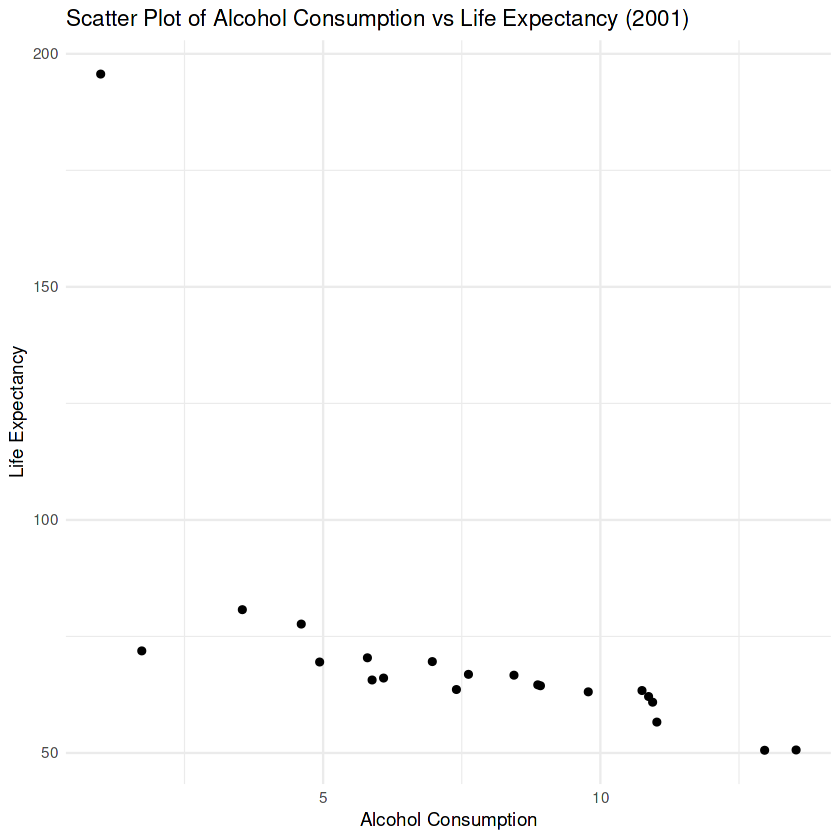

In [13]:
library(ggplot2)

data_2001 <- data %>% filter(Year == 2001)

ggplot(data_2001, aes(x = Alcohol, y = Life_Expectancy)) +
  geom_point() +
  labs(title = "Scatter Plot of Alcohol Consumption vs Life Expectancy (2001)",
       x = "Alcohol Consumption",
       y = "Life Expectancy") +
  theme_minimal()

correlation <- cor(data_2001$Alcohol, data_2001$Life_Expectancy, 
                   use = "complete.obs")

print(paste("Correlation coefficient:", correlation))

# answer is in the markdown below 

There is a negative corelation between Alchol consumption and Life expentency.
Correlation coefficient is -0.62992474988049

There are outliers in the data we need to check the corelation removing the outliers.

[1] "Cleaned correlation coefficient: -0.824756143117233"


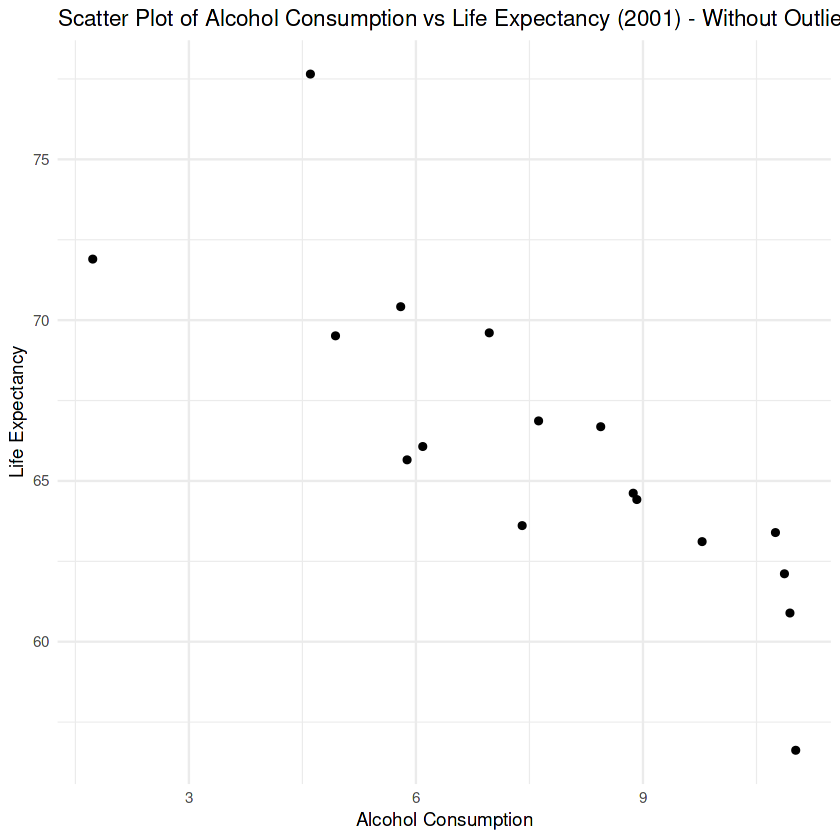

In [25]:
iqr_alcohol <- IQR(data_2001$Alcohol, na.rm = TRUE)
iqr_life_expectancy <- IQR(data_2001$Life_Expectancy, na.rm = TRUE)

lower_bound_alcohol <- quantile(data_2001$Alcohol, 0.25) - 1.5 * iqr_alcohol
upper_bound_alcohol <- quantile(data_2001$Alcohol, 0.75) + 1.5 * iqr_alcohol
lower_bound_life_expectancy <- quantile(data_2001$Life_Expectancy, 0.25) - 1.5 * iqr_life_expectancy
upper_bound_life_expectancy <- quantile(data_2001$Life_Expectancy, 0.75) + 1.5 * iqr_life_expectancy

cleaned_data <- data_2001 %>%
  filter(Alcohol >= lower_bound_alcohol & Alcohol <= upper_bound_alcohol &
         Life_Expectancy >= lower_bound_life_expectancy & Life_Expectancy <= upper_bound_life_expectancy)

ggplot(cleaned_data, aes(x = Alcohol, y = Life_Expectancy)) +
  geom_point() +
  labs(title = "Scatter Plot of Alcohol Consumption vs Life Expectancy (2001) - Without Outliers",
       x = "Alcohol Consumption",
       y = "Life Expectancy") +
  theme_minimal()

cleaned_correlation <- cor(cleaned_data$Alcohol, cleaned_data$Life_Expectancy, use = "complete.obs")

print(paste("Cleaned correlation coefficient:", cleaned_correlation))

# answer is in the markdown below 

Inference :-

After removing outlier data using IQR, we have strong negative corelation between Alcohol consumption and Life expectency. Cleaned correlation coefficient is -0.824756143117233.

*Problem 3*

Convert the Tuberculosis column of countries in 2001 to a binary column based on the presence or absence of tuberculosis cases. Calculate the point-biserial correlation between the binary tuberculosis column and the life expectancy column. (2 points)

In [30]:
library(psych)

data_2001 <- data_2001 %>%
  mutate(Tuberculosis_Binary = ifelse(Tuberculosis > 0, 1, 0))

correlation_test <- cor.test(data_2001$Tuberculosis_Binary, data_2001$Life_Expectancy)

print(paste("Point-biserial correlation coefficient:", correlation_test$estimate))
print(paste("P-value:", correlation_test$p.value))

# answer is in the markdown below 

[1] "Point-biserial correlation coefficient: 0.131263017936104"
[1] "P-value: 0.57061027420569"


Inference :- 

- Point-biserial correlation coefficient is 0.131263017936104 which suggests there is a weak positive relationship between the binary tuberculosis variable and life expectancy.

- P-value is 0.57061027420569 which suggests that the observed correlation is not statistically significant, and there is not sufficient evidence to reject the null hypothesis.

*Problem 4*

Estimate the phi coefficient correlation between the occurrence of infant deaths and the presence of polio cases in 2001. Convert the two columns into a contingency table. (2 points)

In [32]:
data_2001 <- data_2001 %>%
  mutate(Infant_Deaths_Binary = ifelse(Infant_Deaths > 0, 1, 0),
         Polio_Binary = ifelse(Polio > 0, 1, 0))

contingency_table <- table(data_2001$Infant_Deaths_Binary, data_2001$Polio_Binary)

print("Contingency Table:")
print(contingency_table)

phi_coefficient <- sqrt(chisq.test(contingency_table)$statistic / sum(contingency_table))

print(paste("Phi coefficient:", phi_coefficient))

# answer is in the markdown below 

[1] "Contingency Table:"
   
     0  1
  0  7  1
  1  3 10


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


[1] "Phi coefficient: 0.528245049354778"


Inference :-

A phi coefficient of 0.528 indicates moderate association. This indicates a moderate positive relationship between the presence of polio cases and infant deaths.

The Phi-coefficient is given by:
$$
\phi = \frac{n_{11} \cdot n_{00} - n_{10} \cdot n_{01}}{\sqrt{n_{X1} \cdot n_{X0} \cdot n_{Y1} \cdot n_{Y0}}}
$$
used to find the strength of relation between 2 binary variables, where in the following representations hold:
- **n11**: Number of cases where \( X = 1 \) and \( Y = 1 \).
- **n00**: Number of cases where \( X = 0 \) and \( Y = 0 \).
- **n10**: Number of cases where \( X = 1 \) and \( Y = 0 \).
- **n01**: Number of cases where \( X = 0 \) and \( Y = 1 \).

- **nX1**: Total number of cases where \( X = 1 \). 
- **nX0**: Total number of cases where \( X = 0 \). 
- **nY1**: Total number of cases where \( Y = 1 \). 
- **nY0**: Total number of cases where \( Y = 0 \). 


*Problem 5*

Calculate the Spearman-Rank correlation coefficient between the two sets of ranks, Life Expectancy and GDP, to explore the relationship between the same during the year 2001. (Rank the countries based on life expectancy and GDP, assigning a rank of 1 to the country with the highest value in each category.)  Now, statistically infer whether this correlation is significant at `α = 0.05`, and test the hypothesis that the correlation coefficient is `at least 0.35.` (2 points)

In [33]:
names(data)

[1] "SlNo"                            "Country"                        
 [3] "Year"                            "Status"                         
 [5] "Life_Expectancy"                 "Tuberculosis"                   
 [7] "Influenza"                       "Adult_Mortality"                
 [9] "Infant_Deaths"                   "Alcohol"                        
[11] "Percentage_Expenditure"          "Hepatitis_B"                    
[13] "Measles"                         "Under_Five_Deaths"              
[15] "Polio"                           "Total_Expenditure"              
[17] "Diphtheria"                      "HIV_AIDS"                       
[19] "GDP"                             "Population"                     
[21] "Thinness_1_19_Years"             "Thinness_5_9_Years"             
[23] "Income_Composition_Of_Resources" "Schooling"

In [35]:
data_2001 <- data_2001 %>%
  mutate(Life_Expectancy_Rank = rank(-Life_Expectancy, ties.method = "average"),
         GDP_Rank = rank(-GDP, ties.method = "average"))

spearman_correlation <- cor(data_2001$Life_Expectancy_Rank, data_2001$GDP_Rank, 
                            method = "spearman")

print(paste("Spearman-Rank correlation coefficient:", spearman_correlation))

correlation_test <- cor.test(data_2001$Life_Expectancy_Rank, 
                             data_2001$GDP_Rank, method = "spearman")


print(paste("P-value for Spearman correlation test:", correlation_test$p.value))

# answer is in the markdown below 

[1] "Spearman-Rank correlation coefficient: 0.881818181818182"
[1] "P-value for Spearman correlation test: 1.44165983073755e-06"


Inference :- 

- The Spearman-Rank correlation coefficient of 0.881818181818182 indicates a strong positive relationship between life expectancy and GDP. This is a significant correlation in the context of ranks, meaning countries with higher life expectancy generally have higher GDP and the ranking orders are strongly aligned.

- Hypothesis test :-
  - Null Hypothesis (H₀): The correlation coefficient is less than or equal to 0.35.
  - Alternative Hypothesis (Hₐ): The correlation coefficient is greater than 0.35.

- The p-value is extremely small, much less than α=0.05. This indicates that the observed correlation is statistically significant.

*Problem 6*

`A report mentions a significant decline in the U.S. healthcare outcomes between the 1990s and 2010s, using data from life expectancy and disease prevalence. Contributors of the report utilized words such as “crisis” to describe the current state of the healthcare system at the time. It was an imminent call to action for reformation.` What are your thoughts on this? Was it truly due to the decline in the quality of the healthcare system? (1 point)
- Your task is to explore answers given by different Large Language Models (Optionally, as a bonus, you can test out open-source models via local inference! You can find a few @[huggingface](https://huggingface.co/models?sort=trending) here) or Small LM or Quantised Models.
- Which gave the best results? Why do you think so?

*fin*